# YOLO_v3 Custom Dataset (2 Classes)

* https://github.com/AlexeyAB/darknet#custom-object-detection 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. GPU & CUDA & cuDNN

>## 1) GPU Type

In [ ]:
!nvidia-smi 

Sun Apr  9 01:01:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

>## 2) CUDA Version

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


> ## 3) cuDNN Library Version

In [ ]:
!cat /usr/include/x86_64-linux-gnu/cudnn_v*.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 7
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

/* cannot use constexpr here since this is a C-only file */


# II. Custom Data_Set

* 2 Classes

> ## 1) 'custom_data' & 'darknet' 경로 설정

In [ ]:
!mkdir /content/yolo_custom_modeling 

In [ ]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


>## 2) wget From Github

* 'maskdataset_2C.zip' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip

--2023-04-09 01:01:34--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19667795 (19M) [application/zip]
Saving to: ‘maskdataset_2C.zip’

maskdataset_2C.zip  100%[===================>]  18.76M  --.-KB/s    in 0.1s    

2023-04-09 01:01:35 (144 MB/s) - ‘maskdataset_2C.zip’ saved [19667795/19667795]



* 다운로드 결과 확인

In [ ]:
!ls -l 

total 19208
-rw-r--r-- 1 root root 19667795 Apr  9 01:01 maskdataset_2C.zip


> ## 3) Unzip

In [ ]:
!unzip -q '/content/yolo_custom_modeling/maskdataset_2C.zip'

* Unzip 결과 확인

In [ ]:
!ls -l '/content/yolo_custom_modeling'

total 19220
-rw-r--r-- 1 root root     2523 Feb  1 14:33 creating-files-data-and-name.py
-rw-r--r-- 1 root root     3025 Feb  1 15:02 creating-train-and-test-txt-files.py
drwxr-xr-x 4 root root     4096 Apr  9 01:01 dataset
-rw-r--r-- 1 root root 19667795 Apr  9 01:01 maskdataset_2C.zip


# III. Train vs. Test Split

* 현재 작업 경로

In [ ]:
!pwd

/content/yolo_custom_modeling


>## 1) classes.txt 생성

In [ ]:
classes_text = """no_mask
mask
"""

with open("/content/yolo_custom_modeling/dataset/classes.txt", 'w') as file:
    file.write(classes_text)

* 생성 확인

In [ ]:
%cat /content/yolo_custom_modeling/dataset/classes.txt

no_mask
mask


> ## 2) labelled_data.data 생성

* creating-files-data-and-name.py

In [ ]:
!python creating-files-data-and-name.py

* 생성 확인

In [ ]:
!ls -l /content/yolo_custom_modeling/dataset/labelled_data.data 

-rw-r--r-- 1 root root 107 Apr  9 01:01 /content/yolo_custom_modeling/dataset/labelled_data.data


> ## 3) Train & Test Data 목록 생성

* creating-train-and-test-txt-files.py
 - 8:2

In [ ]:
!python creating-train-and-test-txt-files.py

In [ ]:
!ls -l /content/yolo_custom_modeling/dataset/t*.txt

-rw-r--r-- 1 root root  942 Apr  9 01:01 /content/yolo_custom_modeling/dataset/test.txt
-rw-r--r-- 1 root root 3428 Apr  9 01:01 /content/yolo_custom_modeling/dataset/train.txt


# IV. 'darknet' Setting

> ## 1) 'darknet' Clone

* 현재 작업 경로

In [ ]:
!pwd 

/content/yolo_custom_modeling


* darknet Clone

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.17 MiB | 8.12 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


* Clone 확인

In [ ]:
%ls -l

total 19224
-rw-r--r--  1 root root     2523 Feb  1 14:33 creating-files-data-and-name.py
-rw-r--r--  1 root root     3025 Feb  1 15:02 creating-train-and-test-txt-files.py
drwxr-xr-x 14 root root     4096 Apr  9 01:01 darknet/
drwxr-xr-x  4 root root     4096 Apr  9 01:01 dataset/
-rw-r--r--  1 root root 19667795 Apr  9 01:01 maskdataset_2C.zip


> ## 2) 'Makefile' Configuration

* darknet 디렉토리로 이동

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


* Makefile 확인

In [ ]:
!ls -l Makefile

-rw-r--r-- 1 root root 5961 Apr  9 01:01 Makefile


* Makefile 수정

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

> ## 3) 'darknet' Installation


* Makefile 실행
 -  약 2분

In [ ]:
%%time

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (i

# V. 'darknet' Learning


* 현재 작업 경로

In [ ]:
!pwd

/content/yolo_custom_modeling/darknet


> ## 1) 실행권한 설정

* 실행권한 확인

In [ ]:
!ls -l darknet

-rwxr-xr-x 1 root root 6747168 Apr  9 01:03 darknet


* 실행권한 추가

In [ ]:
# !chmod +x darknet

* Configuration Check

In [ ]:
!./darknet detector

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


> ## 2) 실행환경 확인

* 현재 작업 경로

In [ ]:
!pwd 

/content/yolo_custom_modeling/darknet


* 작업 경로 변경

In [ ]:
%cd ..

/content/yolo_custom_modeling


* 'backup' 디렉토리 생성

In [ ]:
!mkdir backup

* 'backup' 디렉토리 생성 확인

In [ ]:
!ls -l

total 19228
drwxr-xr-x  2 root root     4096 Apr  9 01:03 backup
-rw-r--r--  1 root root     2523 Feb  1 14:33 creating-files-data-and-name.py
-rw-r--r--  1 root root     3025 Feb  1 15:02 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root     4096 Apr  9 01:03 darknet
drwxr-xr-x  4 root root     4096 Apr  9 01:01 dataset
-rw-r--r--  1 root root 19667795 Apr  9 01:01 maskdataset_2C.zip


* labelled_data.data 파일 확인

In [ ]:
!ls -l dataset/labelled_data.data

-rw-r--r-- 1 root root 107 Apr  9 01:01 dataset/labelled_data.data


* yolov3-tiny-custom.cfg 파일 확인

In [ ]:
!ls -l dataset/yolov3-tiny-custom.cfg

-rw-r--r-- 1 root root 1967 Feb  1 14:33 dataset/yolov3-tiny-custom.cfg


> ## 3) 학습 실행

* 약 100분
 - 4000 epochs

In [ ]:
%%time

!darknet/darknet detector train dataset/labelled_data.data dataset/yolov3-tiny-custom.cfg -map -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 682044, rewritten_bbox = 0.390444 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.916036), count: 3, class_loss = 0.047174, iou_loss = 0.023079, total_loss = 0.070253 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.832138), count: 13, class_loss = 0.703978, iou_loss = 0.254259, total_loss = 0.958236 
 total_bbox = 682060, rewritten_bbox = 0.390435 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.838454), count: 5, class_loss = 0.224494, iou_loss = 0.117148, total_loss = 0.341642 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.644586), count: 27, class_loss = 1.553175, iou_loss = 1.114330, total_loss = 2.667505 
 total_bbox = 682092, rewritten_bbox = 0.390417 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.788920), count: 3, class_loss = 0.031328, iou_loss = 0.

> ## 4) 모델 생성 확인

* Loss & mAP 

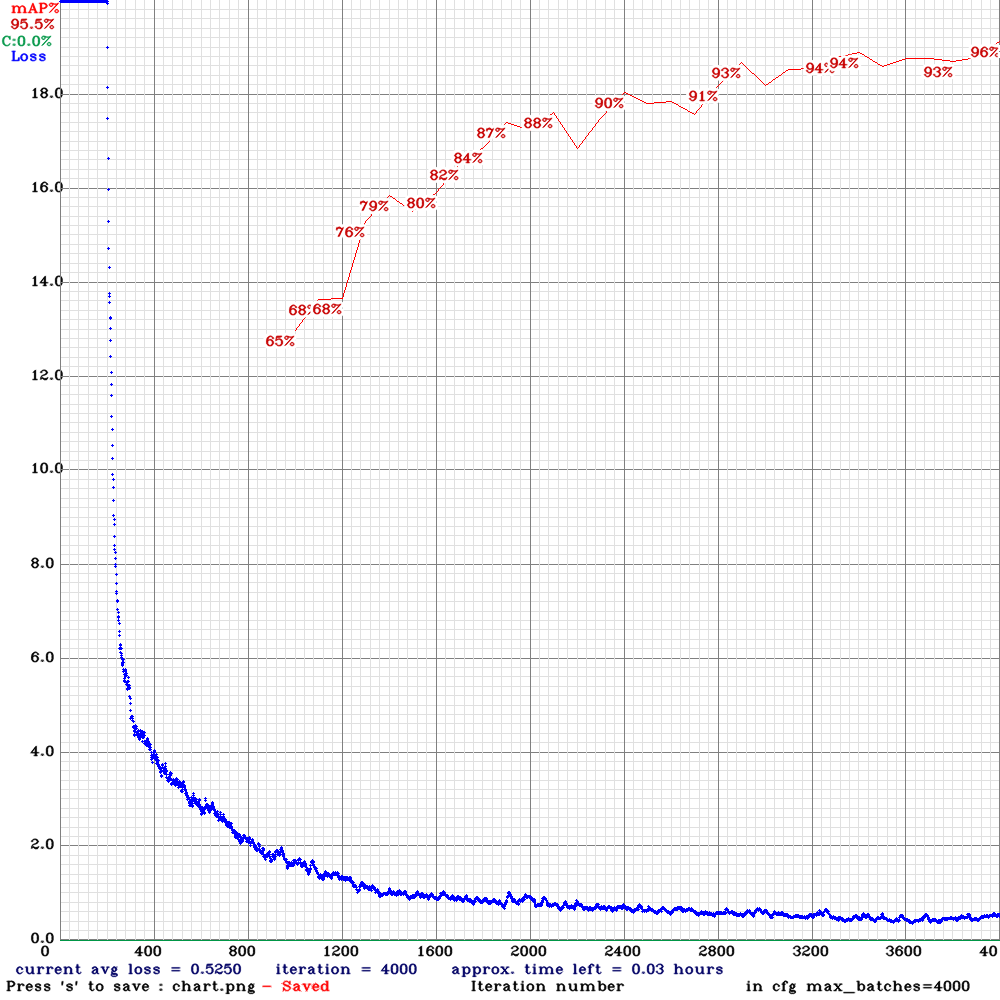

In [ ]:
from IPython.display import Image

Image('/content/yolo_custom_modeling/chart.png')

* 작업 경로 변경

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


* yolov3-tiny-custom_final.weights 생성 확인

In [ ]:
!ls -l ../backup

total 237328
-rw-r--r-- 1 root root 34714236 Apr  9 01:20 yolov3-tiny-custom_1000.weights
-rw-r--r-- 1 root root 34714236 Apr  9 01:37 yolov3-tiny-custom_2000.weights
-rw-r--r-- 1 root root 34714236 Apr  9 01:53 yolov3-tiny-custom_3000.weights
-rw-r--r-- 1 root root 34714236 Apr  9 02:11 yolov3-tiny-custom_4000.weights
-rw-r--r-- 1 root root 34714236 Apr  9 02:11 yolov3-tiny-custom_best.weights
-rw-r--r-- 1 root root 34714236 Apr  9 02:11 yolov3-tiny-custom_final.weights
-rw-r--r-- 1 root root 34714236 Apr  9 02:11 yolov3-tiny-custom_last.weights


# VI. 학습결과 확인

> ## 1) 'coco.names' Update

* 아래 내용으로 수정 후 진행

 - no_mask
 - mask

In [ ]:
!cp -f /content/yolo_custom_modeling/dataset/classes.names /content/yolo_custom_modeling/darknet/data/coco.names

> ## 2) Object Detection 실행

In [ ]:
# -- mask_test는 1~5까지 임의로 변경하며 테스트 가능 # last to final
# yolov3-tiny-custom.cfg 에서 Testing의 batch, subdivisions 주석 해제, Training에 주석 달기 
!./darknet detect ../dataset/yolov3-tiny-custom.cfg ../backup/yolov3-tiny-custom_final.weights ../dataset/test/mask_test_1.jpg -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128

> ## 3) Object Detection 결과 확인

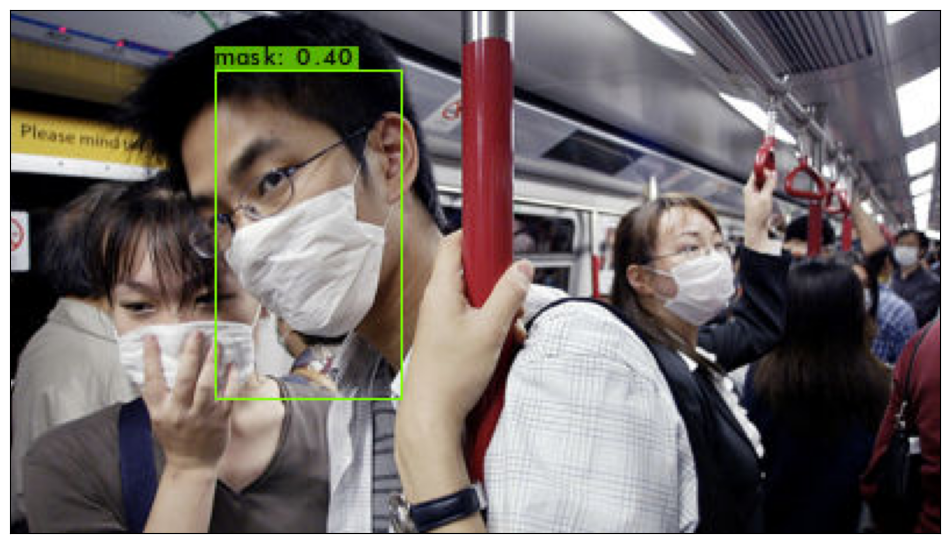

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

PIL_img = Image.open('predictions.jpg')

plt.figure(figsize = (12, 9))
plt.imshow(PIL_img)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 